In [22]:
import keras 
from keras.datasets import mnist 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras import backend as K
import seaborn as sns
from keras.callbacks import ReduceLROnPlateau, CSVLogger
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools

%matplotlib inline

batch_size = 128
num_classes = 10
epochs = 12

img_rows, img_cols = 28, 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [23]:
x_train.shape

(60000, 28, 28)

In [24]:
print(K.image_data_format())
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
x_test.shape

channels_last


(10000, 28, 28, 1)

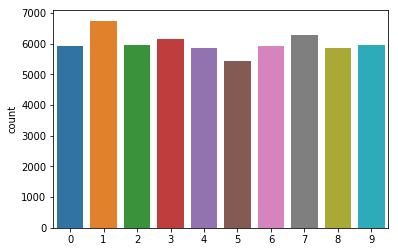

In [25]:
# check balancing
g = sns.countplot(y_train)

In [26]:
# check null missing

In [27]:
# normalization

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train sample')
print(x_test.shape[0], 'test sample')

# convert class vectors  to binary class one hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



x_train shape: (60000, 28, 28, 1)
60000 train sample
10000 test sample


In [28]:
# data augmentation

In [29]:
# Model 
def Model_1():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', 
                    input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    return model
    

In [9]:
model = Sequential()
model = Model_1()
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adadelta(),
             metrics=['accuracy'])

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                           patience=3,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr=0.00001)

csv_logger = CSVLogger(filename='log.csv',
                       separator=',',
                       append=True)

history = model.fit(x_train, y_train, batch_size=batch_size,
         epochs=epochs,
         verbose=1,
         validation_data=(x_test, y_test),
         callbacks=[learning_rate_reduction, csv_logger])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss', score[0])
print('Test acc:', score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 76s 1ms/step - loss: 0.2630 - acc: 0.9195 - val_loss: 0.0550 - val_acc: 0.9823
Epoch 2/12
60000/60000 [==============================] - 75s 1ms/step - loss: 0.0883 - acc: 0.9736 - val_loss: 0.0432 - val_acc: 0.9850
Epoch 3/12
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0658 - acc: 0.9804 - val_loss: 0.0371 - val_acc: 0.9868
Epoch 4/12
60000/60000 [==============================] - 76s 1ms/step - loss: 0.0564 - acc: 0.9832 - val_loss: 0.0291 - val_acc: 0.9901
Epoch 5/12
60000/60000 [==============================] - 74s 1ms/step - loss: 0.0472 - acc: 0.9853 - val_loss: 0.0289 - val_acc: 0.9898
Epoch 6/12
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0402 - acc: 0.9876 - val_loss: 0.0305 - val_acc: 0.9898
Epoch 7/12
60000/60000 [==============================] - 74s 1ms/step - loss: 0.0381 - acc: 0.9880 - val_loss: 0.0298 - val_acc

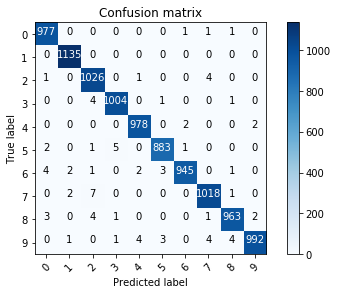

In [30]:
# confusion matrix

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment='center',
                color='white' if cm[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

plot_confusion_matrix(confusion_mtx, classes= range(10))

